# Exercise 11.3

### Introduction
The purpose of this third and last exercise is to develope a **Deep Neural Network**, and use the appropiate optimizer and loss, in order to fit the 2D dataset.

### Dataset
The set is made of 5250 points, their *x* is a couple of coordinates uniformly generated in $[-1.5, 1.5) \times [-1.5, 1.5)$, while *y* is calculated using the following function

$$
y = \sin(x^2 + y^2)
$$

5000 points compose the training set, and the other 250 points are the validation set.

### Neural Network
The neural network is sequential, made of six layers of relu activated neurons: the first one of 50 neurons, the second one of 100, the third of 200, the fourth and fifth of 400 neurons, and, obviously, the last one of 1 neuron, in order to provide the expected output.

As optimizer has been chosen the **Adam**, and as loss measure has been chosen the **mean squared error**.

The network has been trained for 50 epochs, dividing the training set into batch of 20 elements each, and shuffling the set at the end of every epoch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Sine 2D function to fit
def f(x, y):
    return np.sin(x**2 + y**2)

xlim = 1.5
ylim = 1.5
# Fixing the training, validation & fitting parameters
# Training
ntrain = 5000
sigma = 0.  # Noise
# Validation
nvalid = 250
# Fitting
bsize = 20
nepoc = 50
# Fixing Neural Network parameters
# Number of hidden neurons per layer
nhn1 = 50
nhn2 = 100
nhn3 = 200
nhn4 = 400
nhn5 = 400

# Generation of training and validation points
np.random.seed(10)
x_t = np.zeros((ntrain, 2))
x_v = np.zeros((ntrain, 2))
for i in range(ntrain):
    x_t[i, 0] = np.random.uniform(-xlim, xlim)
    x_t[i, 1] = np.random.uniform(-ylim, ylim)
    x_v[i, 0] = np.random.uniform(-xlim, xlim)
    x_v[i, 1] = np.random.uniform(-ylim, ylim)

y_t = np.random.normal(f(x_t[:, 0], x_t[:, 1]), sigma)
y_v = np.random.normal(f(x_v[:, 0], x_v[:, 1]), sigma)
# Ideal linear function (for comparison)
y_c = f(x_v[:, 0], x_v[:, 1])

# Neural network setup
model = Sequential()
model.add(Dense(nhn1, input_shape=(2,), activation="relu"))
model.add(Dense(nhn2, activation="relu"))
model.add(Dense(nhn3, activation="relu"))
model.add(Dense(nhn4, activation="relu"))
model.add(Dense(nhn5, activation="relu"))
model.add(Dense(1, activation="relu"))
# Neural network compile
model.compile(optimizer="Adam", loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_3 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 401       
Total params: 266,651
Trainable params: 266,651
Non-trainable params: 0
__________________________________________________

In [2]:
# Fit the model (trainig dataset)
history = model.fit(x=x_t, y=y_t, batch_size=bsize,
                    epochs=nepoc, verbose=1, shuffle=True, validation_data=(x_v, y_v))

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 0.1086 - val_loss: 0.0312
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0201 - val_loss: 0.0144
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.0133
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0143
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0213 - val_loss: 0.0139
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0129
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0142 - val_loss: 0.0149
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.0130
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.0129
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0235

### Results
The plot below shows the trend of the losses of the training and validation set in function of the epochs.


Test loss (validation) = 0.013999328948557377

Test loss (comparison) = 0.013999328948557377


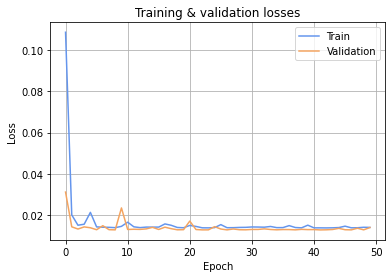

In [3]:
# Get the weights of the linear regression
w = model.get_weights()
# Evaluate the model (validation)
score = model.evaluate(x_v, y_v, batch_size=bsize, verbose=0)
# Print performance
print()
print("Test loss (validation) =", score)
# Evaluate the model (comparison)
score = model.evaluate(x_v, y_c, batch_size=bsize, verbose=0)
# Print performance
print()
print("Test loss (comparison) =", score)
# Save model on file
save_model_path="Saved/model.h5"
model.save(filepath=save_model_path, include_optimizer=True)

# Plot training and validation losses
plt.plot(history.history["loss"], color="cornflowerblue")
plt.plot(history.history["val_loss"], color="sandybrown")
plt.title("Training & validation losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="best")
plt.grid()
plt.show()

### Predictions
The result can be tested generating 100 points, and using the predict method of the trained model to estimate the value of the *y* according to the given *x*. It is difficult to observe the agreement between the prediction and the surface, but by calculating the difference betweem the *z* coordinate of the predicted points and the true *z* of the surface, one can notice that the agreement is fine, expecially at the center of the given set, while near the boundary the result is worse, this result is the similar to the one obtained in the previous exercise.

In the end, one can see the plot which relates the distance from the origin of the Cartesian plane, that corresponds to the center of the dataset, and the error made in the prediction, one can notice that, as already said, the agreement is good in the neighbourhoods of the center, while is much worse at the boundary.

In [4]:
# Prediction
x_p = np.zeros((100, 2))
for i in range(100):
    x_p[i, 0] = np.random.uniform(-xlim, xlim)
    x_p[i, 1] = np.random.uniform(-ylim, ylim)

y_p = model.predict(x_p)
prediction = np.zeros(100)
for i in range(100):
    prediction[i] = float(y_p[i])

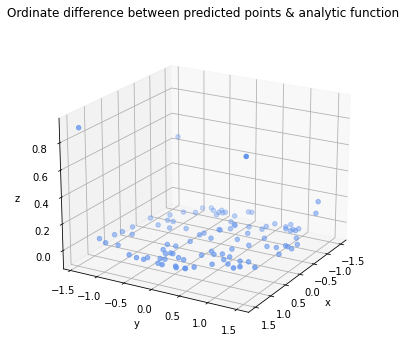

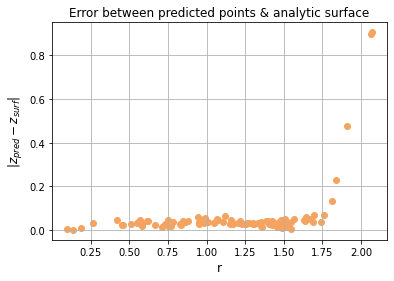

In [5]:
def radius(x, y):
    return np.sqrt(x**2 + y**2)

# Plot the predicted points & the comparison data
fig = plt.figure(figsize=[6, 6])
ax = plt.axes(projection='3d')
ax.view_init(20, 30)
ax.scatter3D(x_p[:, 0], x_p[:, 1], prediction - f(x_p[:,0], x_p[:,1]), color="cornflowerblue")
ax.set_title("Ordinate difference between predicted points & analytic function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

# Error in function of r (polar coordinates)
arr = np.zeros((100, 2))
for i in range(100):
    arr[i,0] = radius(x_p[i,0], x_p[i,1])
    arr[i,1] = prediction[i] - f(x_p[i,0], x_p[i,1])
arr = arr[arr[:,0].argsort()]

plt.scatter(arr[:,0], abs(arr[:,1]), color="sandybrown")
plt.title("Error between predicted points & analytic surface")
plt.xlabel("r", fontsize=12)
plt.ylabel(r"$|z_{pred} - z_{surf}|$", fontsize=12)
plt.grid()
plt.show()